# Risk Analysis - Hypothesis Testing

https://github.com/harshita-loomba/Risk-Analysis

In this extended risk analysis project, we will build upon the previous exploratory data analysis (EDA) and employ hypothesis testing to gain deeper insights into the data. We aim to identify intuitive patterns and examine relationships between various factors such as education, loan, income, region, age, family size, and children, with the likelihood of being a defaulter.

## Step 1: Data Undertanding

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import chi2

In [99]:
applications=pd.read_csv("D:\iiitb\gradedd assignments\EDA\Bank-loan problem\\application_data.csv")

In [100]:
applications.shape

(307511, 122)

In [101]:
 applications.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [102]:
null_Val_Percentage_1= applications.isnull().sum()/len(applications)*100

In [103]:
null_Val_Percentage_1

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [104]:
Dup_1=applications[applications.duplicated()]

In [105]:
Dup_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


We have conducted a thorough examination of the dataset and determined that there are no instances of duplicate data present.

In [106]:
applications.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


After meticulous scrutiny, it has been determined that the dataset does not contain any instances of ambiguous data.

## Step 2: Data Cleaning

In [107]:
def categorical_analysis(data, x):
    """
    Function to plot a box plot for categorical variables.
    
    Parameters:
    - data: DataFrame containing the data.
    - x: Name of the categorical variable for the x-axis.
    """

    sns.countplot(x)
    plt.xticks(rotation=90)
    
    null_val = x.isnull().sum()
    mode_val = x.mode()
    
    print("Since",x.unique(),"\n is a categorical variable having",null_val,"null values, therefore we replace them with," , mode_val,",which is the mode.")
    
    data.fillna(mode_val,inplace=True)
    
    print("Recheck for null values:",x.isnull().sum())

In [108]:
def numerical_analysis(data, x):
    """
    Function to plot a box plot for categorical variables.
    
    Parameters:
    - data: DataFrame containing the data.
    - x: Name of the categorical variable for the x-axis.
    """
    sns.boxplot(x)
    
    null_val = x.isnull().sum()
    mean_val = x.mean()
    median_val = x.median()
    check_val = math.fmod(median_val, mean_val)
    
    print("mean is:",mean_val)
    print("median is:",median_val)
    
    if check_val < 0.5:
        rep_val = mean_val
        print("The difference between mean and median is not much so mean can be used to replace null values")
        print("Thus,",x,"\n is a numerical variable having,",null_val,",null values, therefore we replace them with," , rep_val,",which is the mean.")
        data.fillna(rep_val,inplace=True)
    else:
        rep_val = median_val
        print("The difference between mean and median is too much so mean cannot be used to replace null values, thus we use median")
        print("Thus,",x,"\n is a numerical variable having,",null_val,",null values, therefore we replace them with," , rep_val,",which is the median.")
        data.fillna(rep_val,inplace=True)
        
    print("Recheck for null values:",x.isnull().sum())

In [109]:
def numerical_analysis_displot(data, x):
    """
    Function to plot a box plot for categorical variables.
    
    Parameters:
    - data: DataFrame containing the data.
    - x: Name of the categorical variable for the x-axis.
    """
    sns.displot(x)
    plt.xticks(rotation=90)
    
    null_val = x.isnull().sum()
    mean_val = x.mean()
    median_val = x.median()
    check_val = math.fmod(median_val, mean_val)
    
    print("mean is:",mean_val)
    print("median is:",median_val)
    
    if check_val < 0.5:
        rep_val = mean_val
        print("The difference between mean and median is not much so mean can be used to replace null values")
        print("Thus,",x,"\n is a numerical variable having,",null_val,",null values, therefore we replace them with," , rep_val,",which is the mean.")
        data.fillna(rep_val,inplace=True)
    else:
        rep_val = median_val
        print("The difference between mean and median is too much so mean cannot be used to replace null values, thus we use median")
        print("Thus,",x,"\n is a numerical variable having,",null_val,",null values, therefore we replace them with," , rep_val,",which is the median.")
        data.fillna(rep_val,inplace=True)
        
    print("Recheck for null values:",x.isnull().sum())

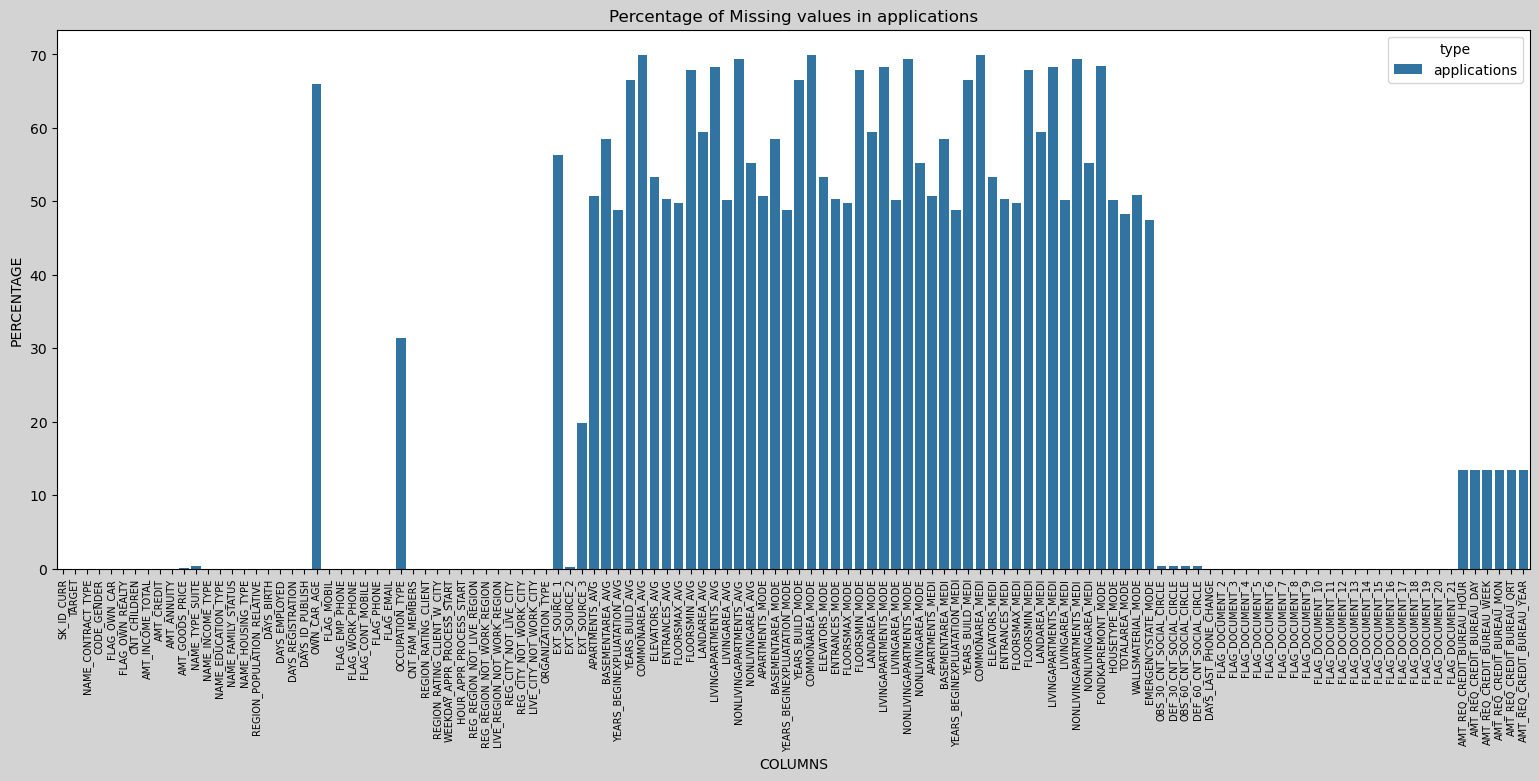

In [110]:
fig1 = plt.figure(figsize=(19,7))
miss_application_data = pd.DataFrame((applications.isnull().sum())*100/applications.shape[0]).reset_index()
miss_application_data["type"] = "applications"
ax = sns.barplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in applications")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("w")
fig1.set_facecolor("lightgrey")

In [111]:
#Removing columns with missing values more than 40%
applications=applications.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG','FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG','LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE','ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE','LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI','BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI','COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI','FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE','WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

mean is: 0.0070002105326475985
median is: 0.0
The difference between mean and median is not much so mean can be used to replace null values
Thus, 0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, Length: 307511, dtype: float64 
 is a numerical variable having, 41519 ,null values, therefore we replace them with, 0.0070002105326475985 ,which is the mean.
Recheck for null values: 0


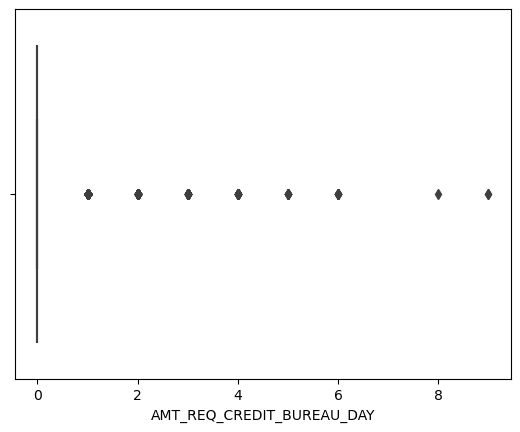

In [112]:
numerical_analysis(applications, applications['AMT_REQ_CREDIT_BUREAU_DAY'])

mean is: 0.006483155858177889
median is: 0.0
The difference between mean and median is not much so mean can be used to replace null values
Thus, 0         0.000
1         0.000
2         0.000
3         0.007
4         0.000
          ...  
307506    0.007
307507    0.007
307508    1.000
307509    0.000
307510    0.000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, Length: 307511, dtype: float64 
 is a numerical variable having, 0 ,null values, therefore we replace them with, 0.006483155858177889 ,which is the mean.
Recheck for null values: 0


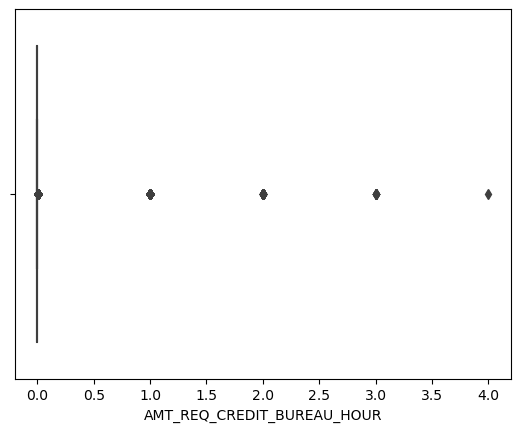

In [113]:
numerical_analysis(applications, applications['AMT_REQ_CREDIT_BUREAU_HOUR'])

mean is: 0.23057595253875432
median is: 0.0
The difference between mean and median is not much so mean can be used to replace null values
Thus, 0         0.000
1         0.000
2         0.000
3         0.007
4         0.000
          ...  
307506    0.007
307507    0.007
307508    0.000
307509    0.000
307510    0.000
Name: AMT_REQ_CREDIT_BUREAU_QRT, Length: 307511, dtype: float64 
 is a numerical variable having, 0 ,null values, therefore we replace them with, 0.23057595253875432 ,which is the mean.
Recheck for null values: 0


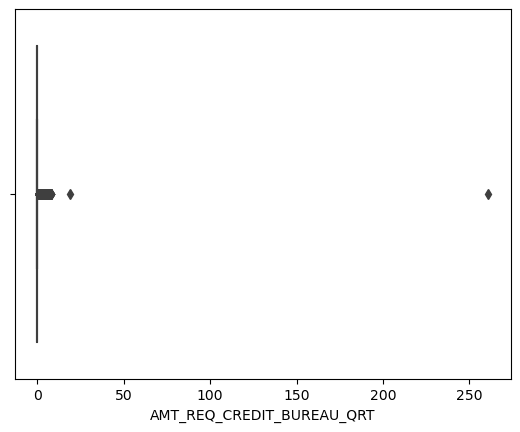

In [114]:
numerical_analysis(applications, applications['AMT_REQ_CREDIT_BUREAU_QRT'])

mean is: 0.006483155858177889
median is: 0.0
The difference between mean and median is not much so mean can be used to replace null values
Thus, 0         0.000
1         0.000
2         0.000
3         0.007
4         0.000
          ...  
307506    0.007
307507    0.007
307508    1.000
307509    0.000
307510    0.000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, Length: 307511, dtype: float64 
 is a numerical variable having, 0 ,null values, therefore we replace them with, 0.006483155858177889 ,which is the mean.
Recheck for null values: 0


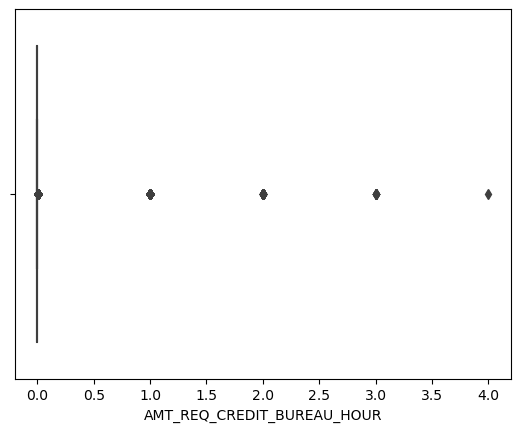

In [115]:
numerical_analysis(applications, applications['AMT_REQ_CREDIT_BUREAU_HOUR'])

mean is: 0.03066765657525948
median is: 0.0
The difference between mean and median is not much so mean can be used to replace null values
Thus, 0         0.000
1         0.000
2         0.000
3         0.007
4         0.000
          ...  
307506    0.007
307507    0.007
307508    0.000
307509    0.000
307510    0.000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, Length: 307511, dtype: float64 
 is a numerical variable having, 0 ,null values, therefore we replace them with, 0.03066765657525948 ,which is the mean.
Recheck for null values: 0


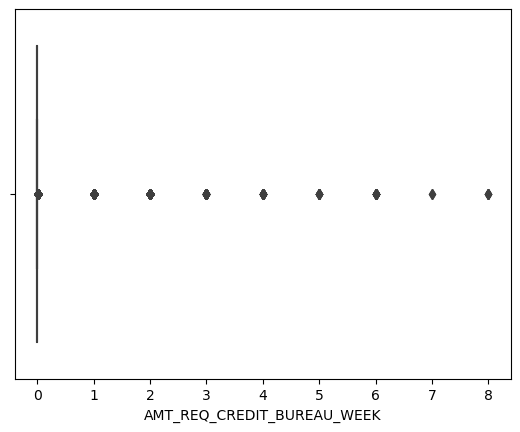

In [116]:
numerical_analysis(applications, applications['AMT_REQ_CREDIT_BUREAU_WEEK'])

mean is: 1.644392043669145
median is: 1.0
The difference between mean and median is too much so mean cannot be used to replace null values, thus we use median
Thus, 0         1.000
1         0.000
2         0.000
3         0.007
4         0.000
          ...  
307506    0.007
307507    0.007
307508    1.000
307509    0.000
307510    1.000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 307511, dtype: float64 
 is a numerical variable having, 0 ,null values, therefore we replace them with, 1.0 ,which is the median.
Recheck for null values: 0


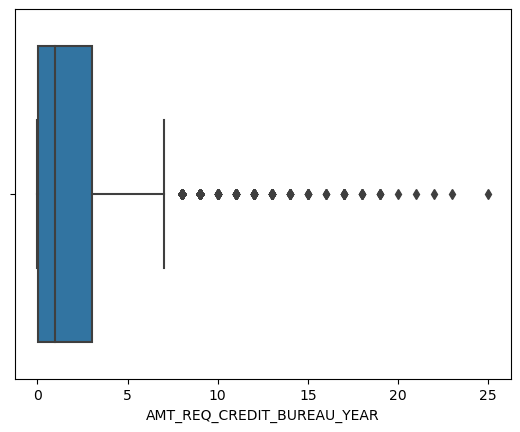

In [117]:
numerical_analysis(applications, applications['AMT_REQ_CREDIT_BUREAU_YEAR'])

mean is: 0.14296772217889459
median is: 0.0
The difference between mean and median is not much so mean can be used to replace null values
Thus, 0         2.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    0.0
307510    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, Length: 307511, dtype: float64 
 is a numerical variable having, 0 ,null values, therefore we replace them with, 0.14296772217889459 ,which is the mean.
Recheck for null values: 0


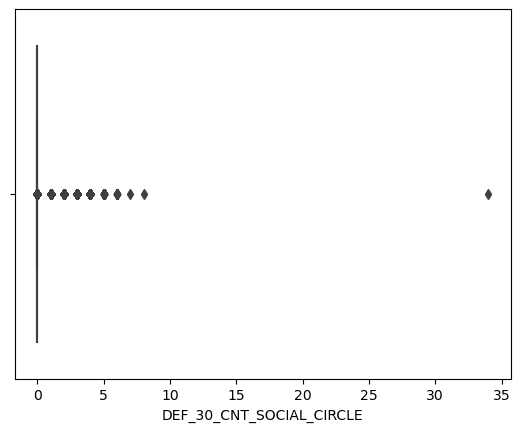

In [118]:
numerical_analysis(applications, applications['DEF_30_CNT_SOCIAL_CIRCLE'])

mean is: 0.09974000024374201
median is: 0.0
The difference between mean and median is not much so mean can be used to replace null values
Thus, 0         2.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    0.0
307510    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, Length: 307511, dtype: float64 
 is a numerical variable having, 0 ,null values, therefore we replace them with, 0.09974000024374201 ,which is the mean.
Recheck for null values: 0


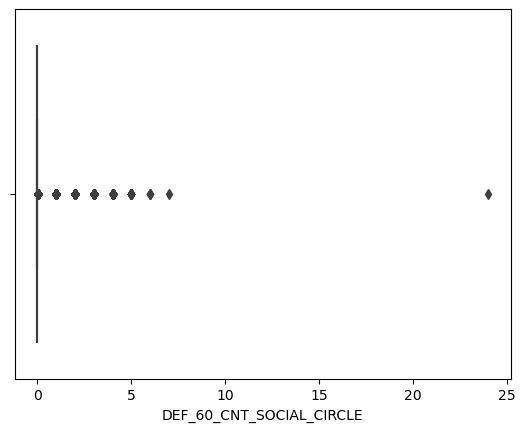

In [119]:
numerical_analysis(applications, applications['DEF_60_CNT_SOCIAL_CIRCLE'])

mean is: 1.4006495612025116
median is: 0.0
The difference between mean and median is not much so mean can be used to replace null values
Thus, 0         2.0
1         1.0
2         0.0
3         2.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    6.0
307509    0.0
307510    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, Length: 307511, dtype: float64 
 is a numerical variable having, 0 ,null values, therefore we replace them with, 1.4006495612025116 ,which is the mean.
Recheck for null values: 0


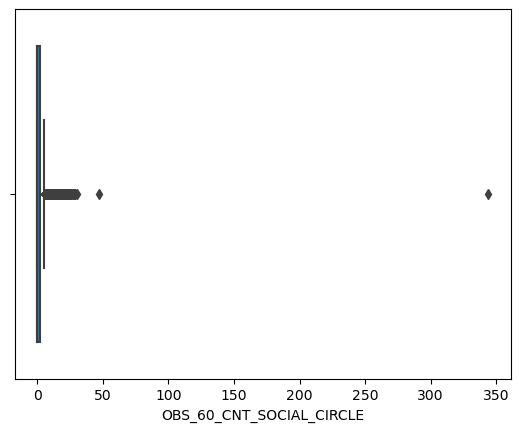

In [120]:
numerical_analysis(applications, applications['OBS_60_CNT_SOCIAL_CIRCLE'])

mean is: 27107.516051731487
median is: 24903.0
The difference between mean and median is too much so mean cannot be used to replace null values, thus we use median
Thus, 0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
           ...   
307506    27558.0
307507    12001.5
307508    29979.0
307509    20205.0
307510    49117.5
Name: AMT_ANNUITY, Length: 307511, dtype: float64 
 is a numerical variable having, 0 ,null values, therefore we replace them with, 24903.0 ,which is the median.
Recheck for null values: 0


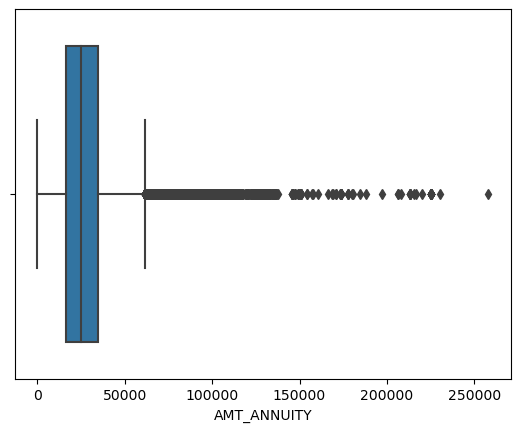

In [121]:
numerical_analysis(applications, applications['AMT_ANNUITY'])

mean is: 2.15265149539503
median is: 2.0
The difference between mean and median is too much so mean cannot be used to replace null values, thus we use median
Thus, 0         1.0
1         2.0
2         1.0
3         2.0
4         1.0
         ... 
307506    1.0
307507    1.0
307508    1.0
307509    2.0
307510    2.0
Name: CNT_FAM_MEMBERS, Length: 307511, dtype: float64 
 is a numerical variable having, 0 ,null values, therefore we replace them with, 2.0 ,which is the median.
Recheck for null values: 0


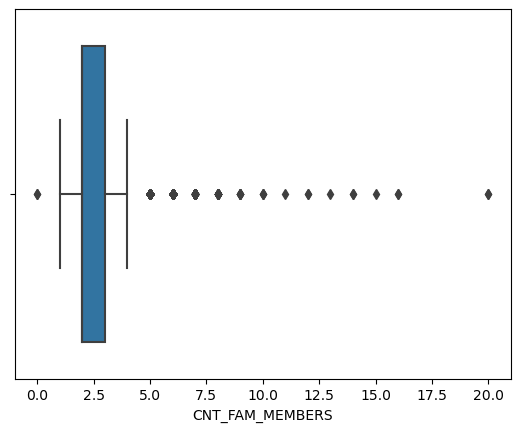

In [122]:
numerical_analysis(applications, applications['CNT_FAM_MEMBERS'])

mean is: -962.8556571732387
median is: -757.0
The difference between mean and median is not much so mean can be used to replace null values
Thus, 0        -1134.0
1         -828.0
2         -815.0
3         -617.0
4        -1106.0
           ...  
307506    -273.0
307507       0.0
307508   -1909.0
307509    -322.0
307510    -787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64 
 is a numerical variable having, 0 ,null values, therefore we replace them with, -962.8556571732387 ,which is the mean.
Recheck for null values: 0


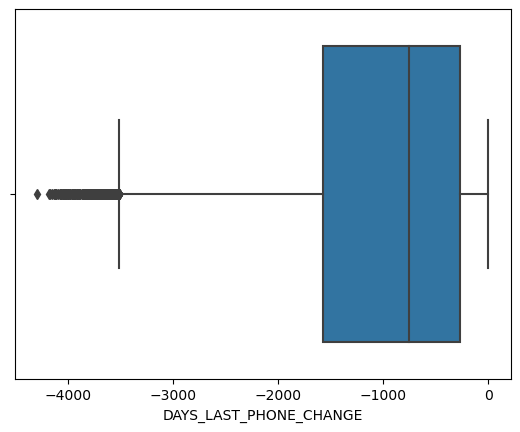

In [123]:
numerical_analysis(applications, applications['DAYS_LAST_PHONE_CHANGE'])

Since ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A'
 0.0070002105326475985 'Other_B' 'Group of people'] 
 is a categorical variable having 0 null values, therefore we replace them with, 0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object ,which is the mode.
Recheck for null values: 0


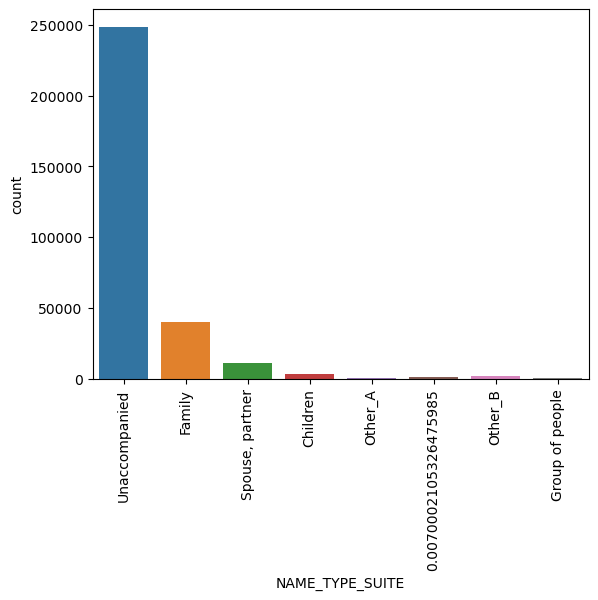

In [124]:
categorical_analysis(applications, applications['NAME_TYPE_SUITE'])

In [125]:
applications.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 70, dtype: int64

In [126]:
applications['DAYS_BIRTH'] = abs(applications['DAYS_BIRTH'])
applications['DAYS_ID_PUBLISH'] = abs(applications['DAYS_ID_PUBLISH'])
applications['DAYS_ID_PUBLISH'] = abs(applications['DAYS_ID_PUBLISH'])


In [127]:
applications['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### The detailed explanation of the cleaning procedure can be found in the provided file link.

## Step-3: EDA

#### EDA has been conducted and documented in the provided link. We will now proceed with concise summaries of univariate, bivariate, and multivariate analysis. Following that, we will validate our findings through hypothesis testing.

###### Key Insights from Univariate Analysis:
1. Low default rate observed in the target variable.
2. Cash loans are the most common type of loans.
3. Gender alone is not a reliable indicator of default, caution needed in its interpretation.
4. Key indicators of financial stability: Car ownership, house ownership, number of children and family members, income, income type, house type, age, and education type.
5. Analysis of credit, annuity, and goods price in relation to income and target variable can provide valuable insights on default trends.
6. Population density of the region can indicate financial opportunities or challenges, analyze its relationship with income, income type, credit, annuity, goods price, and target variable for further understanding.
7. Explore the correlation between education type, income type, income, target variable, credit, annuity, and goods price to gain insights on student loans and loan indicators.

##### Conclusion of Bi Variate Analysis:

The analysis reveals key insights: cash loans have higher default rates; no car or house ownership increases default likelihood; larger families and more children correlate with higher defaults; lower secondary education level associates with default cases; maternity leave or unemployment links to defaults. Further analysis is needed for region density and its relation to income, credit, and annuity. Default tendency rises with age, while annuity, credit, and income below 50,000 indicate higher defaults. These findings inform risk assessment and loan decision-making processes.

##### Conclusion of multi Variate Analysis:
1. There is a strong positive correlation between annuity, credit, and goods price.
2. Age does not exhibit significant correlation with annuity, credit, or goods price.
3. Population density and Income does not exhibit correlation with goods price, credit, or annuity.
4. The number of children and the number of family members show a positive correlation.

##### Attention-grabbing Univariate Analysis Highlights:
- Challenging assumptions: Why gender alone doesn't predict defaults accurately.
- Decoding the financial stability puzzle: Unveiling the crucial indicators.
- Revealing the hidden patterns: Income, credit, annuity, and goods price.
- Unleashing the potential: Population density and its financial implications.
- Demystifying student loans: Education type, income, and loan behavior.

Let's Explore further to uncover the intriguing details and gain a deeper understanding of the loan dynamics!

## Step-4: Hypothesis Testing:

#### Chi- Squared Test:
In order to validate the patterns observed during the EDA and confirm their significance, we perform a chi-squared test for association and independence. This test allows us to assess the relationship between two categorical variables. By applying this test, we can determine if the observed patterns are statistically significant or occurred by chance.

##### 4.1 Challenging assumptions: Why gender alone doesn't predict defaults accurately

##### Null hypothesis (H₀): Gender alone is a significant predictor of defaults.

##### Alternative hypothesis (H₁): Gender alone is not a significant predictor of defaults.

Note: It's important to clarify that the alternative hypothesis does not necessarily imply that gender has no impact on defaults, but rather suggests that gender alone may not be a strong or accurate predictor of defaults when considered independently of other factors.

In [128]:
def chi_test_func(data,Tar_inp,Cat_inp1,Cat_inp2,Cat_inp3,Cat_inp4):
    dataf=pd.DataFrame().assign(Target=applications.Tar_inp,Var1=applications.Cat_inp1,Var2=applications.Cat_inp2,Var3=applications.Cat_inp3,Var4=applications.Cat_inp4)
    # Resultant Dataframe will be a dataframe where the column names and Index will be the same
    # This is a matrix similar to correlation matrix which we get after df.corr()
    # Initialize the values in this matrix with 0
    resultant = pd.DataFrame(data=[(0 for i in range(len(dataff.columns))) for i in range(len(dataf.columns))],columns=list(dataf.columns))
    resultant.set_index(pd.Index(list(dataf.columns)), inplace = True)

    # Finding p_value for all columns and putting them in the resultant matrix
    for i in list(dataf.columns):
        for j in list(dataf.columns):
            if i != j:
                chi2_val, p_val = chi2(np.array(dataf[i]).reshape(-1, 1), np.array(dataf[j]).reshape(-1, 1))
                resultant.loc[i,j] = p_val
    print(resultant)
    
    # Plotting a heatmap
    fig = plt.figure(figsize=(6,6))
    sns.heatmap(resultant, annot=True, cmap='Blues')
    plt.title('Chi-Square Test Results')
    plt.show()

In [129]:
applications.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
 dataf=pd.DataFrame().assign(Target=applications.TARGET,GENDER=applications.CODE_GENDER,EDUCATION=applications.NAME_EDUCATION_TYPE,PROFESSION=applications.NAME_INCOME_TYPE,CAR_OWN=applications.FLAG_OWN_CAR)
    

In [131]:
dataf.head()

,Target,GENDER,EDUCATION,PROFESSION,CAR_OWN
0,1,M,Secondary / secondary special,Working,N
1,0,F,Higher education,State servant,N
2,0,M,Secondary / secondary special,Working,Y
3,0,F,Secondary / secondary special,Working,N
4,0,M,Secondary / secondary special,Working,N


In [180]:
df=pd.DataFrame()
df1=pd.DataFrame()
df2=pd.DataFrame()
df3=pd.DataFrame()
df4=pd.DataFrame()
df5=pd.DataFrame()

In [186]:
df1=pd.get_dummies(dataf.GENDER)
df2=pd.get_dummies(dataf.EDUCATION)
df3=pd.get_dummies(dataf.PROFESSION)   
df4=pd.get_dummies(dataf.CAR_OWN)

In [187]:
df1.head()

,F,M,XNA
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [188]:
df1.value_counts()

F  M  XNA
1  0  0      202448
0  1  0      105059
   0  1           4
dtype: int64

In [189]:
df1.drop(df1.XNA,inplace=True)

In [190]:
df1.head()

,F,M,XNA
2,0,1,0
3,1,0,0
4,0,1,0
5,0,1,0
6,1,0,0


In [191]:
df=pd.concat([df1,df5],axis=1)
df['Target']=applications.TARGET

df.head()

,F,M,XNA,Target
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
5,0,1,0,0
6,1,0,0,0


In [193]:
# Resultant Dataframe will be a dataframe where the column names and Index will be the same
# This is a matrix similar to correlation matrix which we get after df.corr()
# Initialize the values in this matrix with 0
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val


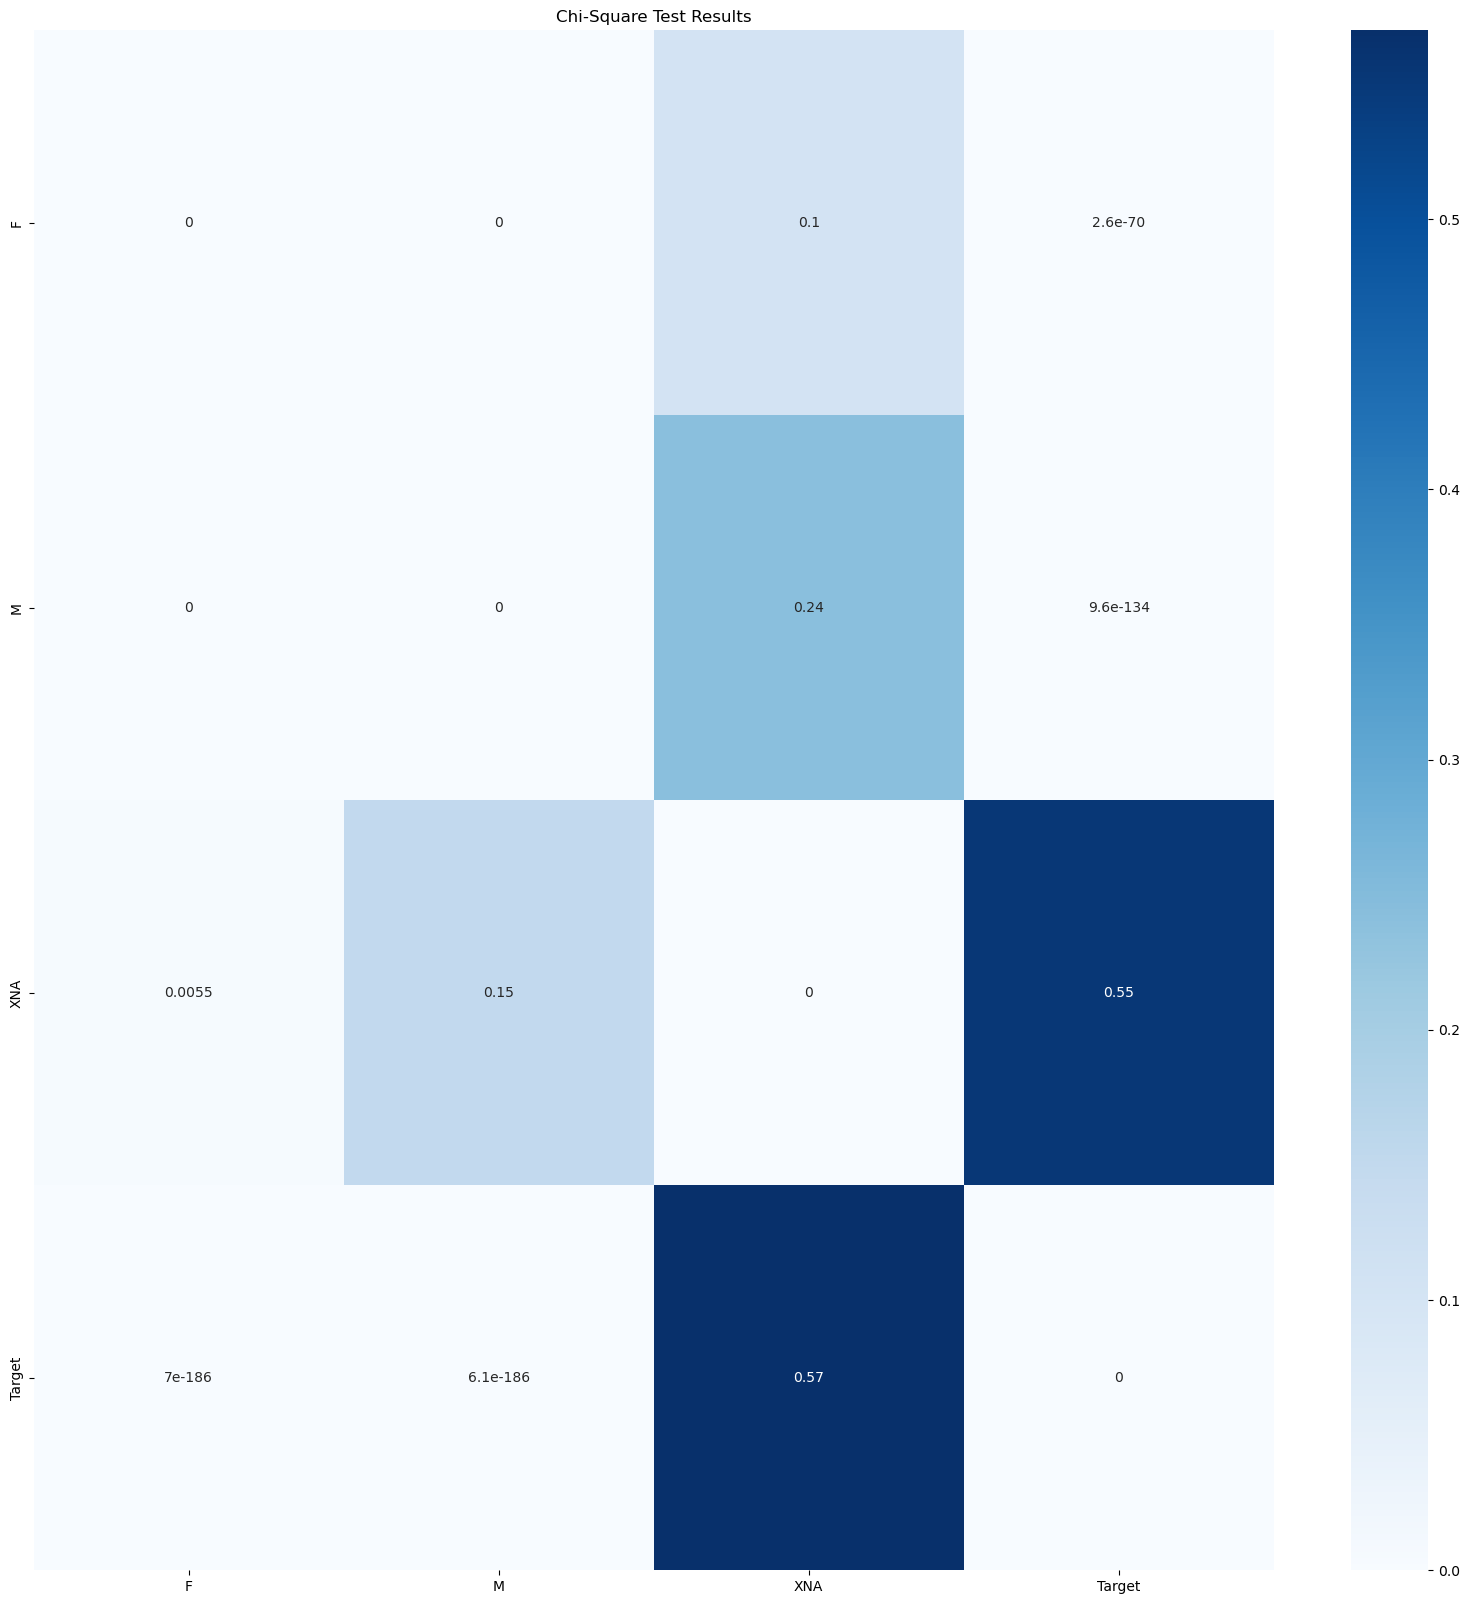

In [158]:
# Plotting a heatmap
fig = plt.figure(figsize=(20,20))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

###### It is important to note that the variable "XNA" has a small number of values, indicating that only a few individuals have chosen not to disclose their gender. Interestingly, these individuals have a high likelihood of being defaulters. Additionally, the p-value obtained from the chi-squared test comparing the target variable with gender (male or female) is very low, indicating that we can reject the null hypothesis and conclude that there is a significant association between gender and default rates.

##### 4.2 Demistifying Student Loans

###### Null Hypothesis: 
There is no relationship between the type of education and loan behavior among students.

###### Alternative Hypothesis: 
There is a significant relationship between the type of education and loan behavior among students, suggesting that different education types and income levels have an impact on the likelihood of defaulting on student loans.

In [207]:
df_new=pd.concat([df2,df5],axis=1)
df_new['Target']=applications.TARGET
#df_new['Income']=applications.AMT_INCOME_TOTAL
df_new.head()

,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Target
0,0,0,0,0,1,1
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [208]:
# Resultant Dataframe will be a dataframe where the column names and Index will be the same
# This is a matrix similar to correlation matrix which we get after df.corr()
# Initialize the values in this matrix with 0
resultant1 = pd.DataFrame(data=[(0 for i in range(len(df_new.columns))) for i in range(len(df_new.columns))], 
                         columns=list(df_new.columns))
resultant1.set_index(pd.Index(list(df_new.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(df_new.columns):
    for j in list(df_new.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df_new[i]).reshape(-1, 1), np.array(df_new[j]).reshape(-1, 1))
            resultant1.loc[i,j] = p_val


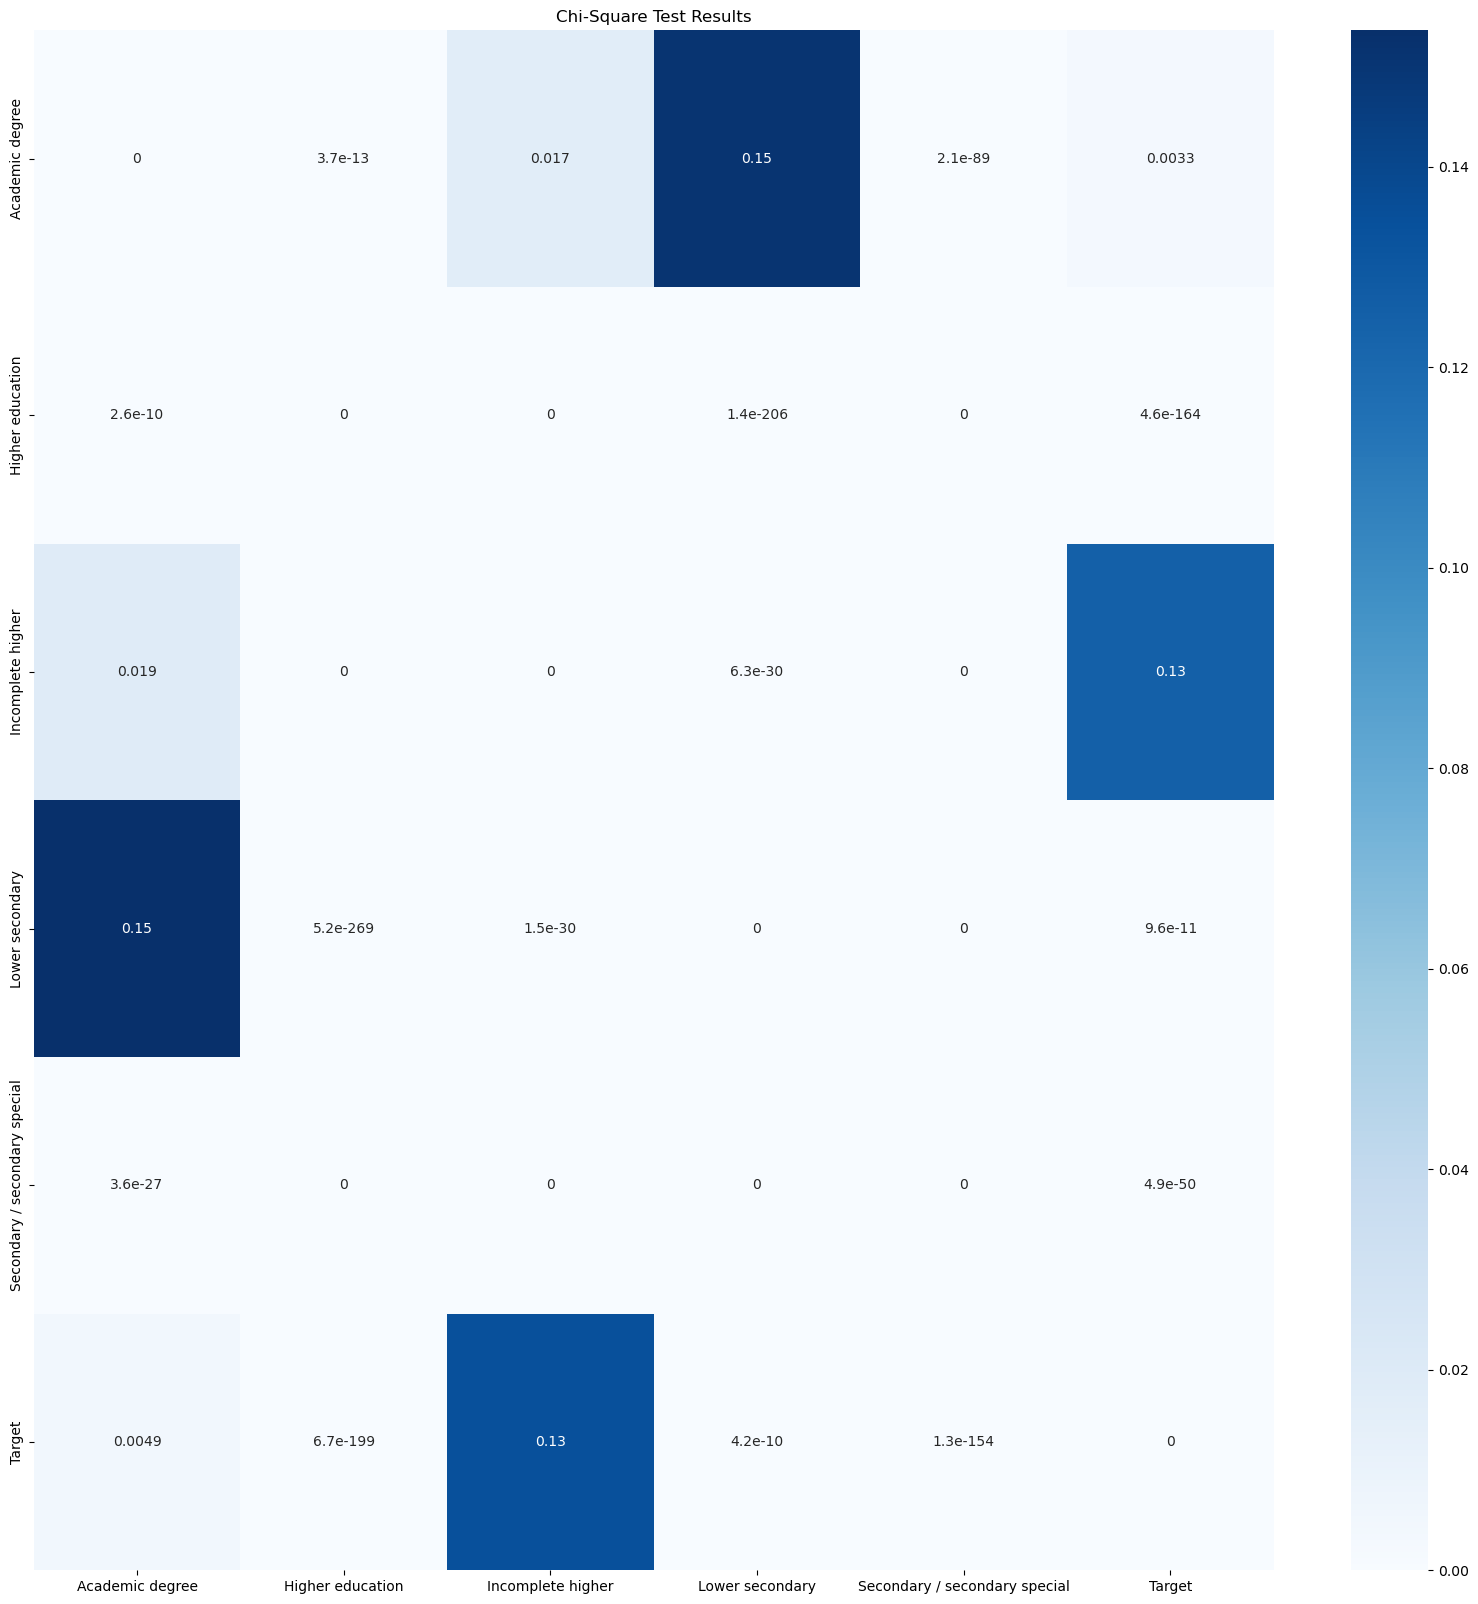

In [209]:
# Plotting a heatmap
fig = plt.figure(figsize=(20,20))
sns.heatmap(resultant1, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

###### Insights:
- For the comparison between the target variable (loan behavior) and incomplete education, the calculated p-value is greater than 0.05, indicating that there is no significant evidence to suggest a relationship between incomplete education and loan behavior.

- Based on further analysis, it can be observed that individuals with lower degree education are strongly associated with the target variable (loan defaulting). Therefore, the null hypothesis, which suggests no relationship between education and defaulting tendency, can be rejected.
